## <u>ASSIGNMENT 05: COMP7116001 - COMPUTER VISION 2022</u>

<table>
    <tr>
        <th style="text-align:left;">Name</th>
        <td style="text-align:left;">Cindy Amanda Onggirawan</td>
        <th style="text-align:left;">Lecturer</th>
        <td style="text-align:left;">Dr. Ir. Diaz D. Santika, M.Sc.</td>
    </tr>
    <tr>
        <th style="text-align:left;">NIM</th>
        <td style="text-align:left;">2440055351</td>
        <th style="text-align:left;">Lecturer Code</th>
        <td style="text-align:left;">D1159</td>
    </tr>
    <tr>
        <th style="text-align:left;">Class</th>
        <td style="text-align:left;" colspan="3">LA01</td>
    </tr>
</table>

### SIFT Based Feature Matching (GSLC 02 Assignment)

Pertama-tama, kita mengimpor semua library yang dibutuhkan. Kita menggunakan CV2 untuk membaca gambar, Numpy untuk bermain bersama array, serta Matplotlib untuk menampilkan gambar.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Kita akan mencocokkan fitur antara dua gambar yaitu menemukan queryImage (img1) di trainImage (img2). 

In [2]:
img1 = cv2.imread('eiffel.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('eiffel_in_scene.png', cv2.IMREAD_GRAYSCALE)

Kita lihat kedua gambar tersebut.

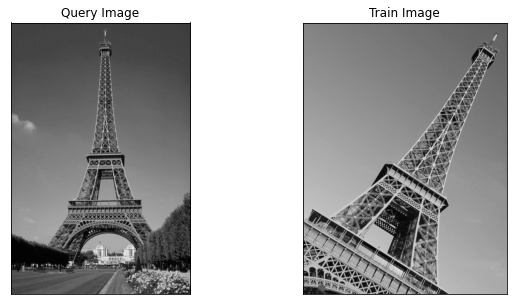

In [3]:
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.imshow(img1, cmap='gray')
plt.title('Query Image')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(img2, cmap='gray')
plt.title('Train Image')
plt.xticks([]), plt.yticks([])

plt.show()

Kita menginisiasi detektor SIFT.

In [4]:
sift = cv2.SIFT_create()

Kita mencari keypoints dan deskriptor gambar dengan SIFT.

In [5]:
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

### 1. Brute Force Matcher: cv2.BFMatcher

Matcher ini berisi kumpulan algoritma yang akan mencoba semua kemungkinan untuk menemukan kecocokan terbaik. Dalam matcher ini, kita harus membuat objek BFMatcher terlebih dahulu menggunakan cv2.BFMatcher() dengan parameter default. Setelah dibuat, kita akan menggunakan BFMatcher.knnMatch() yang akan mengembalikan k kecocokan terbaik di mana nilai k ini kita isi dengan 2.

In [6]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

Kita menerapkan uji rasio.

In [7]:
good = []

for m,n in matches:
    if m.distance < 0.75 * n.distance:
        good.append([m])

Selanjutnya, cv2.drawMatchesKnn() membantu kita menggambarkan k kecocokan terbaik. Ini menampilkan 2 gambar secara horizontal dan menggambar garis dari gambar pertama ke gambar kedua yang menunjukkan kecocokan terbaik. Jika k=2, method ini akan menarik dua garis yang cocok untuk setiap keypoint.

In [8]:
img_BFMatcher = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

Hasilnya adalah sebagai berikut:

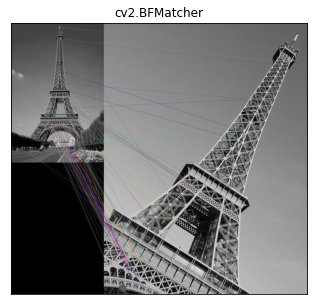

In [9]:
plt.figure(figsize=(10,5))

plt.imshow(img_BFMatcher)
plt.title('cv2.BFMatcher')
plt.xticks([]), plt.yticks([])

plt.show()

### 2. Fast Library for Approximate Nearest Neighbors Matcher: cv2.FLANN

Matcher ini berisi kumpulan algoritma yang dioptimalkan untuk pencarian tetangga terdekat. Jadi, FLANN bekerja lebih cepat daripada BFMatcher untuk kumpulan data besar, tetapi belum tentu yang terbaik. Dalam matcher ini, kita perlu mengirim dua dictionary yang menentukan algoritma yang akan digunakan, parameter terkaitnya, dll. Yang pertama adalah index_params dan yang kedua adalah search_params. Search_params menentukan berapa kali tree dalam index harus dilalui secara rekursif. Nilai yang lebih tinggi memberikan presisi yang lebih baik, tetapi juga membutuhkan lebih banyak waktu.

In [10]:
FLANN_INDEX_KDTREE = 1

index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

Kita membuat objek FlannBasedMatcher terlebih dahulu menggunakan cv2.FlannBasedMatcher() dengan parameter index_params dan search_params. Setelah dibuat, kita akan menggunakan FlannBasedMatcher.knnMatch() yang akan mengembalikan k kecocokan terbaik di mana nilai k ini kita isi dengan 2.

In [11]:
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1, des2, k=2)

Kita hanya ingin menggambar kecocokan yang bagus sehingga kita membuat mask.

In [12]:
matchesMask = [[0,0] for i in range(len(matches))]

Kita menerapkan uji rasio.

In [13]:
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7 * n.distance:
        matchesMask[i] = [1,0]

Kita menentukan warna keypoints dan garis-garis untuk menghubungkan kecocokan antara kedua gambar.

In [14]:
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv2.DrawMatchesFlags_DEFAULT)

Selanjutnya, cv2.drawMatchesKnn() membantu kita menggambarkan k kecocokan terbaik. Ini menampilkan 2 gambar secara horizontal dan menggambar garis dari gambar pertama ke gambar kedua yang menunjukkan kecocokan terbaik. Jika k=2, method ini akan menarik dua garis yang cocok untuk setiap keypoint. Jadi, kita harus melewati sebuah mask jika kita ingin menggambarnya secara selektif.

In [15]:
img_FLANN = cv2.drawMatchesKnn(img1, kp1, img2, kp2, matches, None, **draw_params)

Hasilnya adalah sebagai berikut:

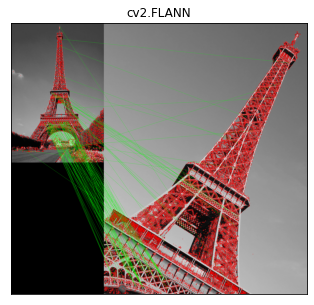

In [16]:
plt.figure(figsize=(10,5))

plt.imshow(img_FLANN)
plt.title('cv2.FLANN')
plt.xticks([]), plt.yticks([])

plt.show()

### Comparison of cv2.BFMatcher and cv2.FLANN

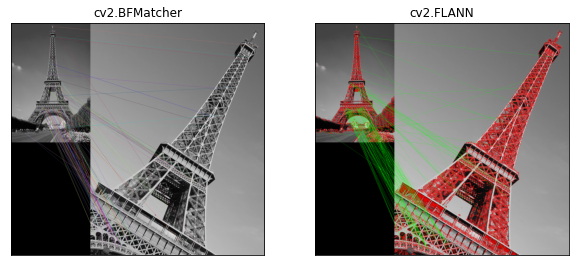

In [17]:
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.imshow(img_BFMatcher)
plt.title('cv2.BFMatcher')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(img_FLANN)
plt.title('cv2.FLANN')
plt.xticks([]), plt.yticks([])

plt.show()

## THANK YOU